In [46]:
library(tidyverse)
library(sjPlot)
library(broom)

# Admission (2-Months)

In [3]:
raw_obs_adm <- read.csv2("../DATA/new_table_obs_adm.csv", header = TRUE, sep = ";")
raw_obs_adm

ID,COVIDEO,CONDITION,IMC,AGE,SEX,INTERNAMENTO,UTI,ETNIA,EVENT,⋯,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,PCR
<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
29,29,NOBS,28.71,72.8,Masculino,Sim,Sim,Preta,Admissão,⋯,1,1,0,0,0,0,0,NA,3,5
85,85,NOBS,25.22,82.9,Feminino,Sim,Sim,Parda,Admissão,⋯,1,0,0,0,0,0,0,1,4,5
339,339,OBS,33.27,51.1,Feminino,Sim,Sim,Parda,Admissão,⋯,1,1,0,0,0,NA,NA,NA,6,61
397,397,NOBS,27.85,69.8,Feminino,Sim,Não,Preta,Admissão,⋯,1,0,0,0,0,0,0,0,2,5
447,447,NOBS,29.76,52.9,Masculino,Sim,Sim,Preta,Admissão,⋯,0,0,0,0,0,1,0,0,2,NA
642,642,OBS,30.39,57.6,Feminino,Sim,Sim,Preta,Admissão,⋯,1,1,0,0,0,NA,NA,NA,3,17
1048,1048,NOBS,28.52,51.6,Feminino,Não,NA,Parda,Admissão,⋯,1,0,1,0,0,1,1,0,6,NA
1525,1525,OBS,31.00,73.5,Masculino,Sim,Sim,Branca,Admissão,⋯,1,0,1,0,0,0,0,0,3,NA
1793,1793,NOBS,28.87,45.1,Masculino,Sim,Sim,Parda,Admissão,⋯,0,0,0,0,0,0,0,0,2,5


In [7]:
obs_adm <- raw_obs_adm %>%
  select(-c(ID,COVIDEO, IMC, AGE, INTERNAMENTO, UTI, ETNIA, EVENT, EXPECT, PCR)) %>%
  na.omit() %>%
  mutate(
    NIVEIS = ifelse(N_SINTOMAS >= 5, ">=5", 
                    ifelse(N_SINTOMAS >=3 & N_SINTOMAS<=4, "3-4",
                    ifelse(N_SINTOMAS >=1 & N_SINTOMAS<=2, "1-2", "None")))
  )

head(obs_adm)

,CONDITION,SEX,SEVERITY,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2,NOBS,Feminino,Grave,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4
4,NOBS,Feminino,Moderado,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2
5,NOBS,Masculino,Grave,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2
7,NOBS,Feminino,Leve,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5
8,OBS,Masculino,Grave,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4
9,NOBS,Masculino,Grave,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2


In [9]:
table(obs_adm$SEX, obs_adm$NIVEIS)

           
            >=5 1-2 3-4 None
  Feminino  107  38  65   10
  Masculino  41  58  57   19

In [30]:
rlog_obs <- obs_adm %>%
  mutate(
    GROUP = (paste(CONDITION, SEX, sep = "_")),
    OUT = ifelse(GROUP == "OBS_Feminino" | GROUP == "NOBS_Feminino", 1, 0),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))

In [32]:
head(rlog_obs)
str(rlog_obs)

,CONDITION,SEX,SEVERITY,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>,<dbl>
2,NOBS,Feminino,Grave,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,1
4,NOBS,Feminino,Moderado,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,1
5,NOBS,Masculino,Grave,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
7,NOBS,Feminino,Leve,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,1
8,OBS,Masculino,Grave,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
9,NOBS,Masculino,Grave,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0


'data.frame':	395 obs. of  19 variables:
 $ CONDITION  : chr  "NOBS" "NOBS" "NOBS" "NOBS" ...
 $ SEX        : chr  "Feminino" "Feminino" "Masculino" "Feminino" ...
 $ SEVERITY   : chr  "Grave" "Moderado" "Grave" "Leve" ...
 $ CEFALEIA   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TOSSE      : int  1 0 0 1 0 1 1 0 1 1 ...
 $ DISPNEIA   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ DOR_CORPO  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FADIGA     : int  1 1 0 1 1 0 0 1 0 1 ...
 $ DOR_TORAC  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ANOREXIA   : int  0 0 0 1 1 0 0 0 0 0 ...
 $ DISFAGIA   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DISFONIA   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ALT_PALADAR: int  0 0 1 1 0 0 0 0 0 0 ...
 $ ALT_OLFATO : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LIM_MOTORA : int  1 0 0 0 0 0 0 0 0 0 ...
 $ N_SINTOMAS : int  4 2 2 6 3 2 2 1 2 3 ...
 $ NIVEIS     : Factor w/ 4 levels "None","1-2","3-4",..: 3 2 2 4 3 2 2 2 2 3 ...
 $ GROUP      : chr  "NOBS_Feminino" "NOBS_Feminino" "NOBS_Masculino" "NOBS_Feminino" ...
 $ OUT        : num 

In [13]:
rlog_obs <- rlog_obs %>%
  filter(CONDITION == "OBS") %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_"), levels = c("OBS_Masculino", "OBS_Feminino")),
    OUT = factor(ifelse(GROUP == "OBS_Feminino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))
head(rlog_obs)

,CONDITION,SEX,SEVERITY,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,OBS,Masculino,Grave,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
2,OBS,Masculino,Grave,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Masculino,0
3,OBS,Masculino,Moderado,0,0,0,0,1,0,0,0,0,0,0,0,1,1-2,OBS_Masculino,0
4,OBS,Feminino,Grave,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Feminino,1
5,OBS,Masculino,Grave,0,1,0,0,0,0,0,0,0,0,0,0,1,1-2,OBS_Masculino,0
6,OBS,Feminino,Grave,0,1,1,0,1,1,0,0,0,0,0,0,5,>=5,OBS_Feminino,1


In [60]:
model <- function(x) {
    glm(OUT ~ + NIVEIS, data = filter(rlog_obs, CONDITION == x),
        family = binomial)
    }

In [61]:
model_obs <- model("OBS")
model_obs
summary(model_obs)


Call:  glm(formula = OUT ~ +NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
(Intercept)    NIVEIS1-2    NIVEIS3-4    NIVEIS>=5  
    -0.6931       0.1431       0.9163       1.9076  

Degrees of Freedom: 174 Total (i.e. Null);  171 Residual
Null Deviance:	    236.3 
Residual Deviance: 211.7 	AIC: 219.7


Call:
glm(formula = OUT ~ +NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.6931     0.5477  -1.266  0.20569   
NIVEIS1-2     0.1431     0.6365   0.225  0.82211   
NIVEIS3-4     0.9163     0.6423   1.427  0.15368   
NIVEIS>=5     1.9076     0.6068   3.143  0.00167 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.34  on 174  degrees of freedom
Residual deviance: 211.71  on 171  degrees of freedom
AIC: 219.71

Number of Fisher Scoring iterations: 4


In [42]:
exp(-0.6931)

[1] 0.5000236

In [40]:
model_nobs <- model("NOBS")
model_nobs
summary(model_nobs)


Call:  glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
(Intercept)    NIVEIS1-2    NIVEIS3-4    NIVEIS>=5  
    -0.5878       0.2575       0.6809       1.2579  

Degrees of Freedom: 219 Total (i.e. Null);  216 Residual
Null Deviance:	    304.3 
Residual Deviance: 295.3 	AIC: 303.3


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.5878     0.5578  -1.054   0.2920  
NIVEIS1-2     0.2575     0.6212   0.415   0.6784  
NIVEIS3-4     0.6809     0.5981   1.138   0.2550  
NIVEIS>=5     1.2579     0.6163   2.041   0.0412 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.33  on 219  degrees of freedom
Residual deviance: 295.25  on 216  degrees of freedom
AIC: 303.25

Number of Fisher Scoring iterations: 4


In [41]:
exp(1.25)

[1] 3.490343

In [50]:
extract_OR <- function(model) {
    tidy(model, conf.int = TRUE, exponentiate = TRUE) %>%
    filter(term != "(Intercept)")
    }

In [54]:
extract_OR(model_obs)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,1.153846,0.6364967,0.2248257,0.822114846,0.3397558,4.288767
NIVEIS3-4,2.500000,0.6422615,1.4266629,0.153677077,0.7330114,9.437732
NIVEIS>=5,6.736842,0.6068413,3.1434763,0.001669539,2.1295773,23.957595


In [53]:
res_obs <- extract_OR(model_obs)
res_nobs <- extract_OR(model_nobs)

In [78]:
results <- bind_rows(res_nobs,res_obs) %>%
    mutate(
        term = gsub("NIVEIS", "Levels: ", term),
    Condition = rep(c("NOBS", "OBS"), each = 3),
    Variable = "Symptoms Levels") %>%
    rename(OR = estimate, CI_low = conf.low, CI_high = conf.high)
head(results)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Levels: 1-2,1.293750,0.6211597,0.4146196,0.678420390,0.3924375,4.681626,NOBS,Symptoms Levels
Levels: 3-4,1.975610,0.5980999,1.1384002,0.254953410,0.6291190,6.880537,NOBS,Symptoms Levels
Levels: >=5,3.518182,0.6162965,2.0411349,0.041237423,1.0824457,12.665148,NOBS,Symptoms Levels
Levels: 1-2,1.153846,0.6364967,0.2248257,0.822114846,0.3397558,4.288767,OBS,Symptoms Levels
Levels: 3-4,2.500000,0.6422615,1.4266629,0.153677077,0.7330114,9.437732,OBS,Symptoms Levels
Levels: >=5,6.736842,0.6068413,3.1434763,0.001669539,2.1295773,23.957595,OBS,Symptoms Levels


Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_errorbarh()`).”


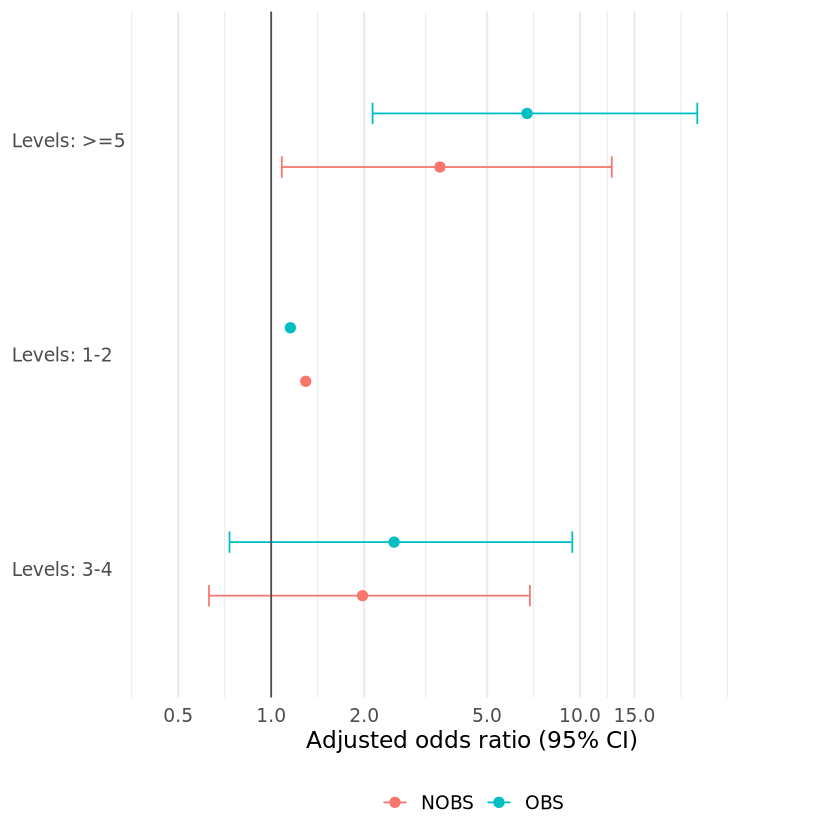

In [103]:
ggplot(results, aes(x = OR, y = fct_rev(term), color = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5) +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "solid", color = "gray30") + 
  scale_x_log10(breaks = c(0.5, 1, 2, 5, 10, 15), limits = c(0.4, 50)) +
  theme_minimal() +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.y = element_text(hjust = 0),
    panel.grid.major.y = element_blank(),
    legend.position = "bottom"
  )

In [79]:
results

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Levels: 1-2,1.293750,0.6211597,0.4146196,0.678420390,0.3924375,4.681626,NOBS,Symptoms Levels
Levels: 3-4,1.975610,0.5980999,1.1384002,0.254953410,0.6291190,6.880537,NOBS,Symptoms Levels
Levels: >=5,3.518182,0.6162965,2.0411349,0.041237423,1.0824457,12.665148,NOBS,Symptoms Levels
Levels: 1-2,1.153846,0.6364967,0.2248257,0.822114846,0.3397558,4.288767,OBS,Symptoms Levels
Levels: 3-4,2.500000,0.6422615,1.4266629,0.153677077,0.7330114,9.437732,OBS,Symptoms Levels
Levels: >=5,6.736842,0.6068413,3.1434763,0.001669539,2.1295773,23.957595,OBS,Symptoms Levels


In [5]:
rlog_nobs <- obs_adm %>%
  filter(CONDITION == "NOBS") %>%
  mutate(
    NOBS = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Masculino", "NOBS_Feminino")),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5"))) %>%  
  select(NOBS, NIVEIS) 
head(rlog_nobs)

,NOBS,NIVEIS
,<fct>,<fct>
1,NOBS_Feminino,3-4
2,NOBS_Feminino,1-2
3,NOBS_Masculino,1-2
4,NOBS_Feminino,>=5
5,NOBS_Masculino,1-2
6,NOBS_Masculino,3-4


In [6]:
mod1 <- glm(OBS ~ NIVEIS, family = "binomial", data = rlog_obs)
mod2 <- glm(NOBS ~ NIVEIS, family = "binomial", data = rlog_nobs)

In [7]:
summary(mod1)


Call:
glm(formula = OBS ~ NIVEIS, family = "binomial", data = rlog_obs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.6931     0.5477  -1.266  0.20569   
NIVEIS1-2     0.1431     0.6365   0.225  0.82211   
NIVEIS3-4     0.9163     0.6423   1.427  0.15368   
NIVEIS>=5     1.9076     0.6068   3.143  0.00167 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.34  on 174  degrees of freedom
Residual deviance: 211.71  on 171  degrees of freedom
AIC: 219.71

Number of Fisher Scoring iterations: 4


In [8]:
summary(mod2)


Call:
glm(formula = NOBS ~ NIVEIS, family = "binomial", data = rlog_nobs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.5878     0.5578  -1.054   0.2920  
NIVEIS1-2     0.2575     0.6212   0.415   0.6784  
NIVEIS3-4     0.6809     0.5981   1.138   0.2550  
NIVEIS>=5     1.2579     0.6163   2.041   0.0412 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.33  on 219  degrees of freedom
Residual deviance: 295.25  on 216  degrees of freedom
AIC: 303.25

Number of Fisher Scoring iterations: 4


In [9]:
model_list <- list() 
model_list[[1]] <- mod1
model_list[[2]] <- mod2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


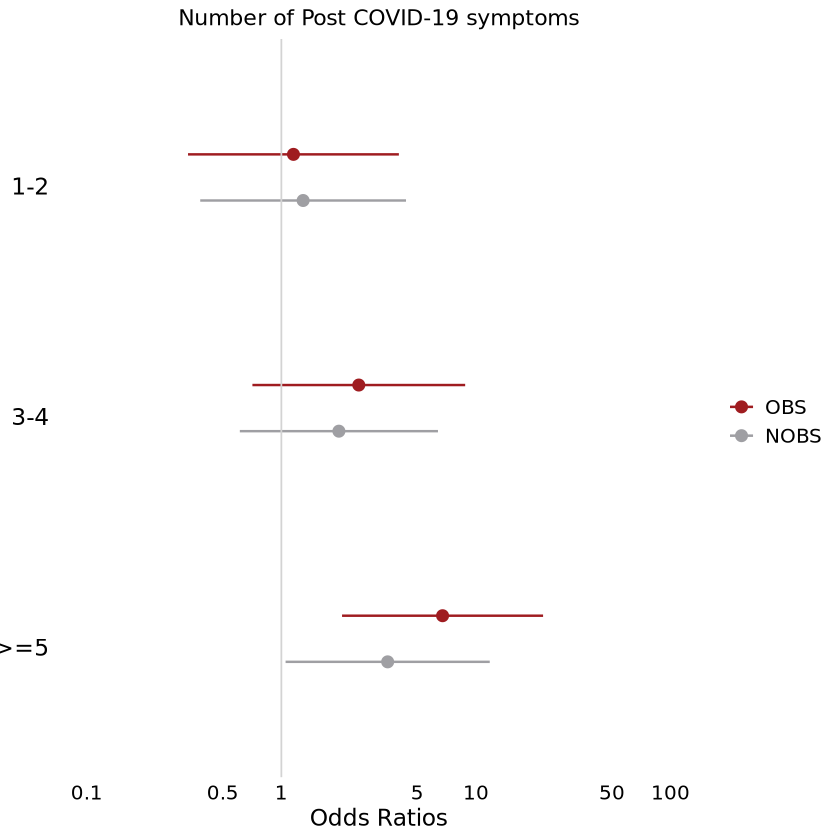

In [10]:
plot_models(model_list) +
    theme_minimal() +
    scale_color_manual(values = c("OBS" = "#9F1C20", "NOBS" = "#9F9FA3")) +
    geom_hline(yintercept = 1, color = "lightgray") +
    ggtitle("Number of Post COVID-19 symptoms") +
    labs(color = "") +
    theme(
        plot.title = element_text(hjust=0.5),
        axis.text = element_text(size = 12, color = "black"),
        axis.text.y = element_text(size = 14,vjust = 1, hjust=1),
        legend.text = element_text(size = 12, color = "black"),
        axis.title.x = element_text(size = 14, color = "black"),
        panel.grid.major = element_blank(), # Remove major grid lines
        panel.grid.minor = element_blank()) 
ggsave("logreg_nsymptoms.pdf", width = 5, height = 5, dpi = 300)
    

# Return (3-Months)

In [11]:
raw_obs_rtn <- read.csv2("../DATA/new_table_obs_return.csv", header = TRUE, sep = ";")

obs_rtn <- raw_obs_rtn %>%
  select(-c(ID,COVIDEO, IMC, AGE, SEVERITY, ETNIA, EVENT, SEVERITY, PCR, SCORE_SAUDE)) %>%
  na.omit() %>%
  mutate(
    NIVEIS = ifelse(N_SINTOMAS >= 5, ">=5", 
                    ifelse(N_SINTOMAS >=3 & N_SINTOMAS<=4, "3-4",
                           ifelse(N_SINTOMAS >=1 & N_SINTOMAS<=2, "1-2", 
                                  ifelse(N_SINTOMAS == 0, "None", ""))))
  )

head(obs_rtn)

,CONDITION,SEX,CEFALEIA,TOSSE,DOR_CORPO,DISPNEIA,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,NIVEIS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,NOBS,Masculino,0,0,0,1,0,0,0,1,0,0,0,2,1-2
3,OBS,Feminino,1,1,1,0,1,1,1,1,1,0,0,8,>=5
4,NOBS,Feminino,0,0,0,0,0,0,0,0,0,0,0,0,None
5,NOBS,Masculino,1,0,1,0,0,0,1,1,0,0,0,4,3-4
6,OBS,Feminino,1,0,1,0,0,0,1,0,1,0,0,4,3-4
7,NOBS,Feminino,0,1,0,1,1,1,0,0,0,0,0,4,3-4


In [48]:
rlog_obs_rtn <- obs_rtn %>%
  filter(CONDITION == "OBS") %>%
  mutate(
    OBS = factor(paste(CONDITION, SEX, sep = "_"), levels = c("OBS_Masculino", "OBS_Feminino")),
    NIVEIS = factor(NIVEIS)) %>%  
  select(OBS, NIVEIS) 
head(rlog_obs_rtn)

,OBS,NIVEIS
,<fct>,<fct>
1,OBS_Feminino,>=5
2,OBS_Feminino,3-4
3,OBS_Masculino,>=5
4,OBS_Masculino,None
5,OBS_Feminino,1-2
6,OBS_Feminino,1-2


In [49]:
rlog_nobs_rtn <- obs_rtn %>%
  filter(CONDITION == "NOBS") %>%
  mutate(
    NOBS = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Masculino", "NOBS_Feminino")),
    NIVEIS = factor(NIVEIS)) %>%  
  select(NOBS, NIVEIS) 
head(rlog_nobs_rtn)

,NOBS,NIVEIS
,<fct>,<fct>
1,NOBS_Masculino,1-2
2,NOBS_Feminino,None
3,NOBS_Masculino,3-4
4,NOBS_Feminino,3-4
5,NOBS_Masculino,None
6,NOBS_Masculino,1-2


In [50]:
dim(rlog_nobs_rtn)
dim(rlog_obs_rtn)

[1] 127   2

[1] 115   2

In [46]:
table(rlog_nobs$NIVEIS, rlog_nobs$NOBS)

      
       NOBS_Masculino NOBS_Feminino
  None              9             5
  1-2              32            23
  3-4              41            45
  >=5              22            43

In [47]:
table(rlog_obs$NIVEIS, rlog_obs$OBS)

      
       OBS_Masculino OBS_Feminino
  None            10            5
  1-2             26           15
  3-4             16           20
  >=5             19           64

In [34]:
table(rlog_nobs_rtn$NIVEIS, rlog_nobs_rtn$NOBS)

      
       NOBS_Masculino NOBS_Feminino
  None             18            11
  1-2              28            25
  3-4               7            19
  >=5               8            11

In [35]:
table(rlog_obs_rtn$NIVEIS, rlog_obs_rtn$OBS)

      
       OBS_Masculino OBS_Feminino
  None            18            5
  1-2             19           19
  3-4              3           26
  >=5              6           19

In [51]:
mod3 <- glm(OBS ~ NIVEIS, family = "binomial", data = rlog_obs_rtn)
mod4 <- glm(NOBS ~ NIVEIS, family = "binomial", data = rlog_nobs_rtn)

In [52]:
summary(mod3)


Call:
glm(formula = OBS ~ NIVEIS, family = "binomial", data = rlog_obs_rtn)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.1527     0.4683   2.461 0.013838 *  
NIVEIS1-2    -1.1527     0.5697  -2.023 0.043042 *  
NIVEIS3-4     1.0068     0.7688   1.310 0.190337    
NIVEISNone   -2.4336     0.6891  -3.532 0.000413 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.79  on 114  degrees of freedom
Residual deviance: 123.61  on 111  degrees of freedom
AIC: 131.61

Number of Fisher Scoring iterations: 4


In [53]:
summary(mod4)


Call:
glm(formula = NOBS ~ NIVEIS, family = "binomial", data = rlog_nobs_rtn)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.3185     0.4647   0.685    0.493
NIVEIS1-2    -0.4318     0.5400  -0.800    0.424
NIVEIS3-4     0.6801     0.6414   1.060    0.289
NIVEISNone   -0.8109     0.6020  -1.347    0.178

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 175.86  on 126  degrees of freedom
Residual deviance: 167.95  on 123  degrees of freedom
AIC: 175.95

Number of Fisher Scoring iterations: 4


In [54]:
model_list2 <- list() 
model_list2[[1]] <- mod3
model_list2[[2]] <- mod4

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


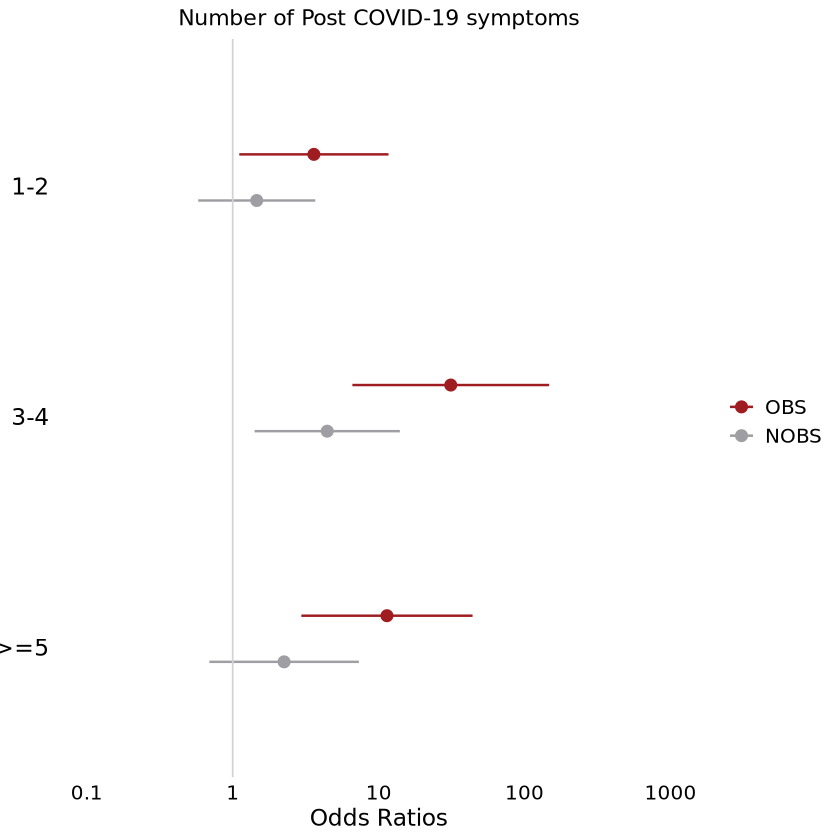

In [40]:
plot_models(model_list2) +
    theme_minimal() +
    scale_color_manual(values = c("OBS" = "#9F1C20", "NOBS" = "#9F9FA3")) +
    geom_hline(yintercept = 1, color = "lightgray") +
    ggtitle("Number of Post COVID-19 symptoms") +
    labs(color = "") +
    theme(
        plot.title = element_text(hjust=0.5),
        axis.text = element_text(size = 12, color = "black"),
        axis.text.y = element_text(size = 14,vjust = 1, hjust=1),
        legend.text = element_text(size = 12, color = "black"),
        axis.title.x = element_text(size = 14, color = "black"),
        panel.grid.major = element_blank(), # Remove major grid lines
        panel.grid.minor = element_blank()) 
ggsave("logreg_rtn_nsymptoms.pdf", width = 5, height = 5, dpi = 300)

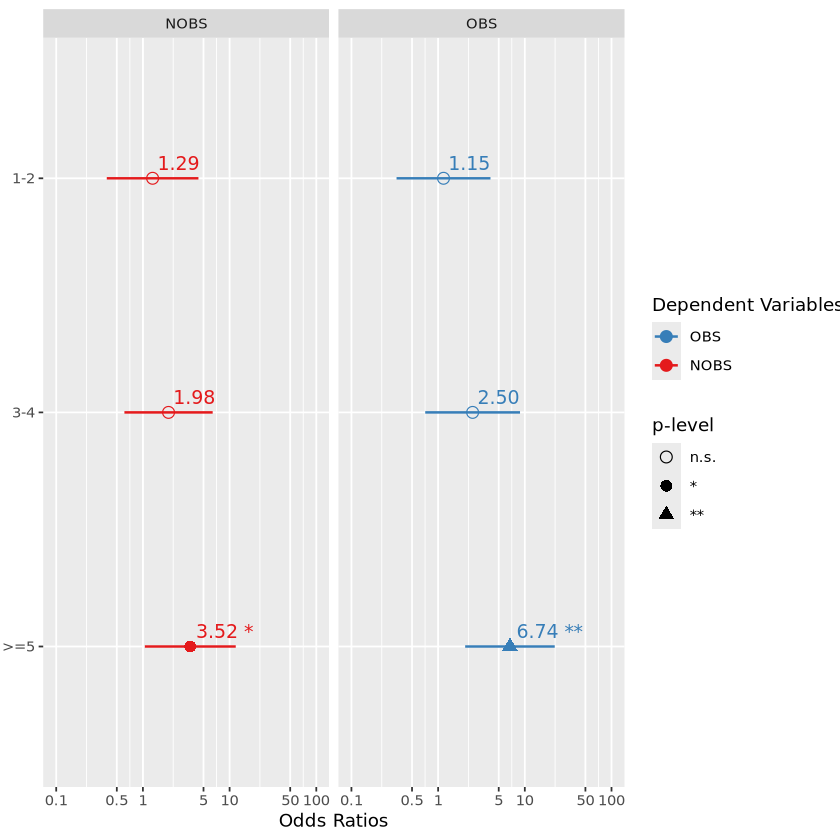

In [41]:
plot_models(mod1,mod2, grid = TRUE , show.values = TRUE, show.p = TRUE, p.shape = TRUE)
ggsave("logreg_adm_nsymptoms.pdf", width = 7, height = 5, dpi = 300)

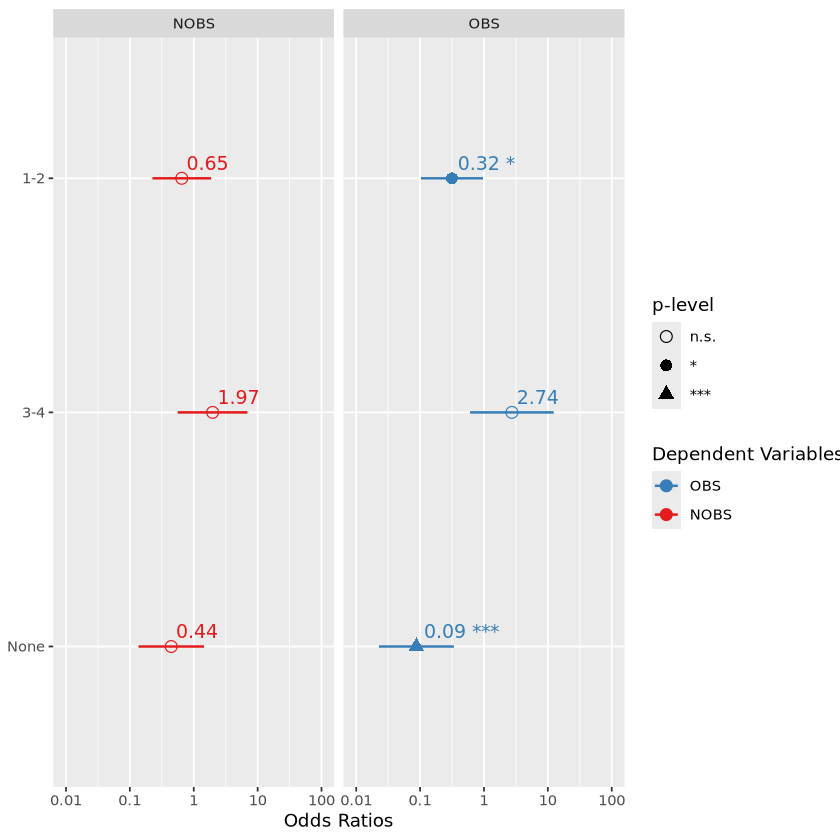

In [55]:
plot_models(mod3,mod4, grid = TRUE , show.values = TRUE, show.p = TRUE, p.shape = TRUE)
ggsave("logreg_rtnn_nsymptoms.pdf", width = 7, height = 5, dpi = 300)

In [26]:
table(rlog_nobs_rtn$NIVEIS)


None  1-2  3-4  >=5 
  14   55   86   65 

In [27]:
table(rlog_obs_rtn$NIVEIS)


None  1-2  3-4  >=5 
  23   38   29   25 

In [28]:
table(rlog_nobs$NIVEIS)


None  1-2  3-4  >=5 
  14   55   86   65 

In [29]:
table(rlog_obs$NIVEIS)


None  1-2  3-4  >=5 
  15   41   36   83 